In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Flatten, Dense
from keras.losses import SparseCategoricalCrossentropy

Using TensorFlow backend.


In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Run
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.5537 - accuracy: 0.8606 - val_loss: 0.3329 - val_accuracy: 0.9117
Epoch 2/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.3249 - accuracy: 0.9100 - val_loss: 0.2965 - val_accuracy: 0.9174
Epoch 3/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2961 - accuracy: 0.9174 - val_loss: 0.2816 - val_accuracy: 0.9235
Epoch 4/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2828 - accuracy: 0.9206 - val_loss: 0.2716 - val_accuracy: 0.9253
Epoch 5/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2738 - accuracy: 0.9237 - val_loss: 0.2727 - val_accuracy: 0.9238
Epoch 6/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2682 - accuracy: 0.9252 - val_loss: 0.2682 - val_accuracy: 0.9266
Epoch 7/30
60000/60000 [==============================] - 2s 29us/st

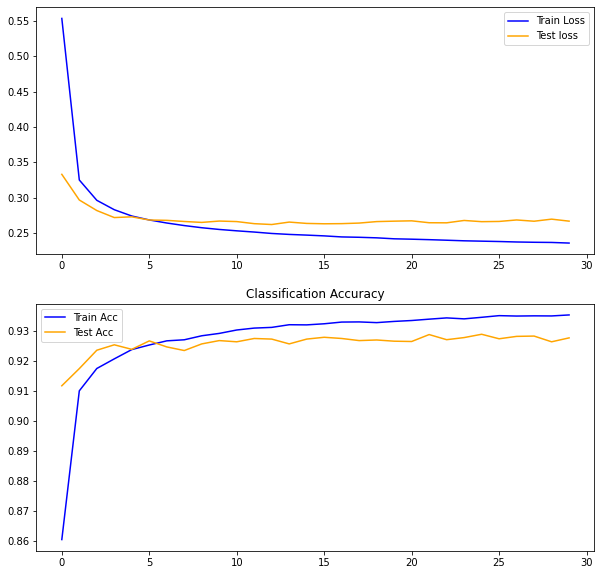

In [5]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))

# plot loss
plt.title('Cross Entropy Loss')
ax1.plot(history.history['loss'], color='blue', label='train')
ax1.plot(history.history['val_loss'], color='orange', label='test')
ax1.legend(('Train Loss', 'Test loss'))

# plot accuracy
plt.title('Classification Accuracy')
ax2.plot(history.history['accuracy'], color='blue', label='train')
ax2.plot(history.history['val_accuracy'], color='orange', label='test')
ax2.legend(('Train Acc', 'Test Acc'))

plt.figsize = (10,10)

In [6]:
# save model
model.save('1layer_dense_model.h5')